<a href="https://colab.research.google.com/github/w4bo/AA2425-unibo-mldm/blob/master/slides/lab-03-datapreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [1]:
import pandas as pd
import numpy as np  # fast operations on arrays
import seaborn as sns  # plots
import matplotlib.pyplot as plt  # plots

df = pd.DataFrame([
    [100,   'low',    '05/07/2021', 10, 2],
    [101,  'medium', '05/07/2021', 25, 1],
    [102,   'high',   '06/07/2021', 100, 3],
    [103, 'high',   '06/07/2021', np.nan, 4],
    [104,  'medium', '06/07/2021', 25, 5]], columns=['ID', 'PriceBin', 'Date', 'Quantity', 'Review'])
df

,ID,PriceBin,Date,Quantity,Review
0,100,low,05/07/2021,10.0,2
1,101,medium,05/07/2021,25.0,1
2,102,high,06/07/2021,100.0,3
3,103,high,06/07/2021,NaN,4
4,104,medium,06/07/2021,25.0,5


# What transformations can we apply?

- **Encoding**: transforming categorical attributes into continuous ones
- **Discretization**: transforming continuous attributes into categorical ones
- **Normalization**: normalizing continuous attributes such that their values fall in the same range
- **Imputation**: imputing missing values
- **Rebalancing**: adjusting the class distribution of a dataset (i.e., the ratio between the different classes/categories represented)
- **Feature Engineering**: defining the set of relevant attributes (variables, predictors) to be used in model construction

# Data distribution

In [2]:
# array with distinct values sorted by first appearance
df["Quantity"].unique()

array([ 10.,  25., 100.,  nan])

In [3]:
# quantity of unique values
df["Quantity"].nunique()

3

# Data distribution

In [4]:
# return a new series that associates each value with its number of occurrences, sorted by frequency
df["Quantity"].value_counts()

Quantity
25.0     2
10.0     1
100.0    1
Name: count, dtype: int64

<Axes: >

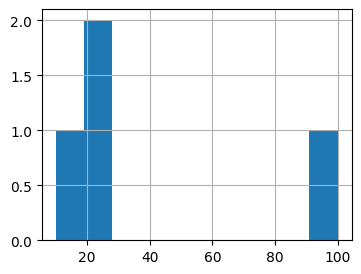

In [5]:
plt.figure(figsize=(4, 3))
df["Quantity"].hist(bins=10)

# Missing values

Datasets often show missing values

- E.g., they are not applicable (e.g., date of death) or unknown
- A series can have missing values, referred to as `NA` (Not Available)
- Numeric attributes: `NA` is `np.nan` (Not a Number)
- `nan` is never equal, greater, or lower than other values (nor itself)

        np.nan == np.nan
        False
- Numeric expressions with `nan` return `nan`

        2 * np.nan – 1
        nan


In [6]:
# add the column "isna", True if the value is NaN
df["isna"] = df["Quantity"].isna()
# add the column "notna", False if the value is NaN
df["notna"] = df["Quantity"].notna()
df[["Quantity", "isna", "notna"]]

,Quantity,isna,notna
0,10.0,False,True
1,25.0,False,True
2,100.0,False,True
3,NaN,True,False
4,25.0,False,True


# Imputing missing values

Several strategies

- Replace `nan` with average or median values
- Dropping rows/columns with nans
- Backward/forward fill

Questions:

- What are the effects of imputation?
- What if we have temporal attributes?

## Filling the values

In [7]:
df["Quantity_mean"] = df["Quantity"].fillna(df["Quantity"].mean())  # fill the missing value with the average
df["Quantity_ffill"] = df["Quantity"].ffill()  # fill the missing value with the previous (not NaN) value
df["Quantity_bfill"] = df["Quantity"].bfill()  # fill the missing value with the following (not NaN) value
imputed_df = df[[x for x in df.columns if "Quantity" in x]]
imputed_df

,Quantity,Quantity_mean,Quantity_ffill,Quantity_bfill
0,10.0,10.0,10.0,10.0
1,25.0,25.0,25.0,25.0
2,100.0,100.0,100.0,100.0
3,NaN,40.0,100.0,25.0
4,25.0,25.0,25.0,25.0


##

In [8]:
imputed_df.describe()

,Quantity,Quantity_mean,Quantity_ffill,Quantity_bfill
count,4.000000,5.000000,5.000000,5.000000
mean,40.000000,40.000000,52.000000,37.000000
std,40.620192,35.178118,44.243644,35.812009
min,10.000000,10.000000,10.000000,10.000000
25%,21.250000,25.000000,25.000000,25.000000
50%,25.000000,25.000000,25.000000,25.000000
75%,43.750000,40.000000,100.000000,25.000000
max,100.000000,100.000000,100.000000,100.000000


C:\Users\matteo.francia5\AppData\Local\Temp\ipykernel_17920\4225687081.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  imputed_df.hist(layout=(1, 4), ax=ax)


array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Quantity_mean'}>,
        <Axes: title={'center': 'Quantity_ffill'}>,
        <Axes: title={'center': 'Quantity_bfill'}>]], dtype=object)

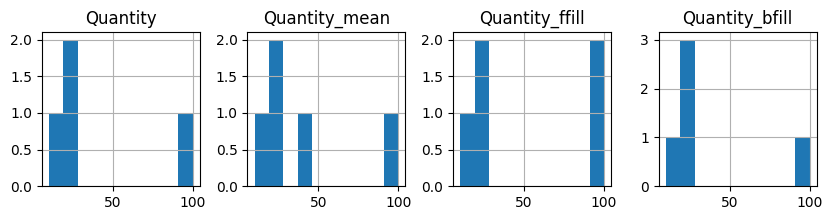

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
imputed_df.hist(layout=(1, 4), ax=ax)

## Dropping values

In [10]:
df.drop(columns=["Quantity"])  # drop the `Quantity` column

,ID,PriceBin,Date,Review,isna,notna,Quantity_mean,Quantity_ffill,Quantity_bfill
0,100,low,05/07/2021,2,False,True,10.0,10.0,10.0
1,101,medium,05/07/2021,1,False,True,25.0,25.0,25.0
2,102,high,06/07/2021,3,False,True,100.0,100.0,100.0
3,103,high,06/07/2021,4,True,False,40.0,100.0,25.0
4,104,medium,06/07/2021,5,False,True,25.0,25.0,25.0


In [11]:
df.dropna()  # drop all rows with missing values in any column
df.dropna(subset=["Quantity"])  # drop all rows with missing values in the column `Quantity`

,ID,PriceBin,Date,Quantity,Review,isna,notna,Quantity_mean,Quantity_ffill,Quantity_bfill
0,100,low,05/07/2021,10.0,2,False,True,10.0,10.0,10.0
1,101,medium,05/07/2021,25.0,1,False,True,25.0,25.0,25.0
2,102,high,06/07/2021,100.0,3,False,True,100.0,100.0,100.0
4,104,medium,06/07/2021,25.0,5,False,True,25.0,25.0,25.0


# Encoding: `PriceBin`

In [12]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])  # Apply Ordinal Encoding to `PriceBin``, define the order of the categories
df['PriceBin_encoded'] = encoder.fit_transform(df[['PriceBin']])
df

,ID,PriceBin,Date,Quantity,Review,isna,notna,Quantity_mean,Quantity_ffill,Quantity_bfill,PriceBin_encoded
0,100,low,05/07/2021,10.0,2,False,True,10.0,10.0,10.0,0.0
1,101,medium,05/07/2021,25.0,1,False,True,25.0,25.0,25.0,1.0
2,102,high,06/07/2021,100.0,3,False,True,100.0,100.0,100.0,2.0
3,103,high,06/07/2021,NaN,4,True,False,40.0,100.0,25.0,2.0
4,104,medium,06/07/2021,25.0,5,False,True,25.0,25.0,25.0,1.0


What about dates?

# Encoding: `Date`

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Setting the date format is essential!
df['Date_unix'] = df['Date'].astype(int) // 10**9  # Convert to seconds since epoch
df

,ID,PriceBin,Date,Quantity,Review,isna,notna,Quantity_mean,Quantity_ffill,Quantity_bfill,PriceBin_encoded,Date_unix
0,100,low,2021-05-07,10.0,2,False,True,10.0,10.0,10.0,0.0,1620345600
1,101,medium,2021-05-07,25.0,1,False,True,25.0,25.0,25.0,1.0,1620345600
2,102,high,2021-06-07,100.0,3,False,True,100.0,100.0,100.0,2.0,1623024000
3,103,high,2021-06-07,NaN,4,True,False,40.0,100.0,25.0,2.0,1623024000
4,104,medium,2021-06-07,25.0,5,False,True,25.0,25.0,25.0,1.0,1623024000


# Data integration

In [14]:
products_df = pd.DataFrame({'ProductID': [100, 101, 102, 103, 104], 'ProductName': ['Cola', 'Bread', 'Beer', 'Diaper', 'Pizza']})
products_df

,ProductID,ProductName
0,100,Cola
1,101,Bread
2,102,Beer
3,103,Diaper
4,104,Pizza


In [15]:
products_df = products_df.rename({"ProductID": "ID"}, axis=1)
combined_df = pd.merge(df, products_df, on='ID', how='left')
combined_df

,ID,PriceBin,Date,Quantity,Review,isna,notna,Quantity_mean,Quantity_ffill,Quantity_bfill,PriceBin_encoded,Date_unix,ProductName
0,100,low,2021-05-07,10.0,2,False,True,10.0,10.0,10.0,0.0,1620345600,Cola
1,101,medium,2021-05-07,25.0,1,False,True,25.0,25.0,25.0,1.0,1620345600,Bread
2,102,high,2021-06-07,100.0,3,False,True,100.0,100.0,100.0,2.0,1623024000,Beer
3,103,high,2021-06-07,NaN,4,True,False,40.0,100.0,25.0,2.0,1623024000,Diaper
4,104,medium,2021-06-07,25.0,5,False,True,25.0,25.0,25.0,1.0,1623024000,Pizza


# Exercise

1. Generate a sales dataframe

```python
{
    'ID': [1, 2, 3, 4, 5],
    'ProductID': [101, 102, 103, 101, 104],
    'PriceBin': ['Low', 'Medium', 'High', np.nan, 'Low'],
    'Date': ['10/01/2024', '10/02/2024', '10/03/2024', '10/04/2024', '10/05/2024'],
    'Quantity': [5, 10, np.nan, 20, 15]
}
```

2. Generate a products dataframe

```python
{
    'productid': [101, 102, 103, 104],
    'ProductName': ['Product A', 'Product B', 'Product C', 'Product D']
}
```

3. Handle missing values in `sales_df`
4. Convert `Date` to Unix timestamp
5. Calculate a column `Total Sales` (quantity * price), assuming that `{'Low': 10, 'Medium': 20, 'High': 30}`
6. Ordinal encode `PriceBin`
7. Scale `Quantity`
8. Join `sales_df` with `products_df` on `ProductID`
9. Print the final dataframe


In [16]:
# Write your code here